In [1]:
import numpy as np
import pandas as pd

import cv2

import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Activation

from sklearn.metrics import accuracy_score

%pylab inline

Using TensorFlow backend.


Populating the interactive namespace from numpy and matplotlib


### Load Train Data

In [12]:
# Load Train dataset
train_data = pd.read_csv('mnist_train.csv')
train_data.shape

(60000, 785)

### Load Test Data

In [13]:
# Load Test dataset
test_data = pd.read_csv('mnist_test.csv')
test_data.shape

(10000, 785)

### Visualize Some Digits

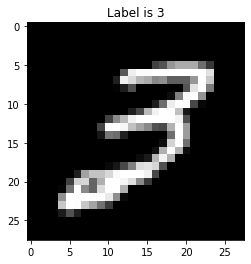

In [14]:
# Which item to show
ITEM_TO_SHOW = 561

# The first column is the label
label = train_data.iloc[ITEM_TO_SHOW, 0]

# The rest of columns are pixels
pixels = train_data.iloc[ITEM_TO_SHOW, 1:]

# Make those columns into a array of 8-bits pixels
# This array will be of 1D with length 784
# The pixel intensity values are integers from 0 to 255
pixels = np.array(pixels, dtype='uint8')

# Reshape the array into 28 x 28 array (2-dimensional array)
pixels = pixels.reshape((28, 28))

# Plot
plt.title('Label is {label}'.format(label=label))
plt.imshow(pixels, cmap='gray')
plt.show()

### Separate Labels

In [15]:
# Separate train labels
train_labels = train_data.label

del train_data['label']

# Transform train labels to classes for cross_entropy
train_labels = pd.get_dummies(train_labels)

# Separate test labels
test_labels = test_data.label

del test_data['label']

### Scale Data

In [16]:
# Scale data to 0..1
train_data = train_data / 255.
test_data = test_data / 255.

### Model Creation

In [17]:
kristofari = Sequential()

kristofari.add(Dense(800, input_dim=784))
kristofari.add(Activation('relu'))
kristofari.add(Dense(10))
kristofari.add(Activation('softmax'))

kristofari.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
kristofari.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 800)               628000    
_________________________________________________________________
activation_1 (Activation)    (None, 800)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                8010      
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
Total params: 636,010
Trainable params: 636,010
Non-trainable params: 0
_________________________________________________________________


### Model Training

In [18]:
%%time

# Required constants
MINIBATCH_SIZE = 64
NUM_OF_EPOCHS = 3

history = kristofari.fit(train_data, train_labels, batch_size=MINIBATCH_SIZE, epochs=NUM_OF_EPOCHS, verbose=1)

Epoch 1/3
60000/60000 [==============================] - 6s 100us/step - loss: 0.2105 - accuracy: 0.9373
Epoch 2/3
60000/60000 [==============================] - 6s 97us/step - loss: 0.0815 - accuracy: 0.9759
Epoch 3/3
60000/60000 [==============================] - 6s 97us/step - loss: 0.0508 - accuracy: 0.9842
CPU times: user 39.5 s, sys: 7.98 s, total: 47.5 s
Wall time: 17.9 s


### Let's Predict!

In [19]:
# Here our neural network makes prediction on _unseen_ test data
prediction = kristofari.predict(test_data)

# Transform a little bit
prediction = np.apply_along_axis(argmax, 1, prediction)

# Finally print the accuracy
final_score = accuracy_score(test_labels, prediction)
print(f"Correctly predicted in {final_score:.2%} cases out of {test_labels.shape[0]} samples!")

Correctly predicted in 98.08% cases out of 10000 samples!


### Now Check AI on Own Digits :)

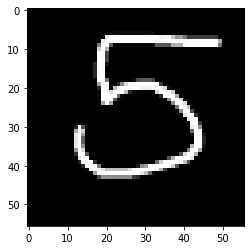

In [22]:
# Read own own hand-written digit and show it
img = cv2.imread("./Peter_Digit_01.png", 0)
plt.imshow(img, cmap='gray')
plt.show()

In [24]:
# Resize to be 28x28
img = cv2.resize(img, (28, 28))

# Scale to 0..1
img = img / 255.

# What digit might be there?
prediction = kristofari.predict(img.reshape((1, 784)))
print(f"Kristofari thinks that it's {prediction.argmax()}")

Kristofari thinks that it's 5
